In [231]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
data=pd.read_csv("interview.csv") #

In [66]:
data.head(2)

,response_id,collection_date,Day,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
0,1,2017-05-24,24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,Male,211,Gen,0.346969
1,2,2017-05-24,24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,Male,189,BC,0.603419


# SOME QUESTIONS

**LOAD INTO DATASET** <br>
**How many samples were collected on each day**<br>
**What proportion of the total respondents were aged less than 45**


In [34]:
data.dtypes

response_id           int64
collection_date      object
urban_rural          object
education            object
income               object
Vote_Now             object
Past_Vote            object
CM_satisfaction      object
MLA_satisfaction     object
age                  object
gender               object
assembly_no           int64
category             object
weight              float64
dtype: object

**qn no 2**

In [57]:
data['collection_date']=pd.to_datetime(data.collection_date)

In [37]:
#data['day']=data.collection_date.dt.day

In [59]:
data.insert(2,"Day",data.collection_date.dt.day)

In [60]:
data['Day'].value_counts()

Day
24    1479
25     998
28     761
27     665
29     620
1      607
26     598
30     582
31     557
Name: count, dtype: int64

**QN 3**

In [61]:
data['age'].unique()

array(['26', '34', '25', '36', '22', '38', '23', '42', '51', '29', '24',
       '30', '39', '37', '19', '44', '53', '32', '21', '18', '20', '27',
       '48', '28', '45', '74', '35', '31', '70', '40', '49', '46', '43',
       '41', '33', '58', '24ko', '56', '50', '55', '54', '62', '60', '59',
       '47', '61', '52', '66', '57', '67', '65', '71', '63', '64', '68',
       '69', '99', '72', '75', '76'], dtype=object)

In [74]:
data.iloc[123,10]=24 # correcting the faulty data

In [72]:
data['age']=data['age'].astype(int)

In [86]:
#or use replace , data['age'].replace({'24ko':24},inplace=True)

In [87]:
(len(data[data['age']<45])/len(data))*100

93.18479685452162

**Create a new column in the dataframe “age_group”. This column should contain the age group the respondent belongs to. The age groups are 18-25, 25-40, 40-55 and 55+. The dataframe should look like this after the column creation.**

In [168]:
conditions = [
    (data['age'] >= 18) & (data['age'] < 25),
    (data['age'] >= 25) & (data['age'] < 40),
    (data['age'] >= 40) & (data['age'] < 55),
    (data['age'] >= 55)
]


In [169]:
choices = ['18-25', '25-40', '40-55', '55+']
        

In [174]:
data.insert(11,'age_group',np.select(conditions, choices, default='Other')) #np.select returns a array that meets the condition 

In [177]:
data['age_group']=np.select(conditions, choices, default='Other')

In [181]:
data.head(2)

,response_id,collection_date,Day,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,age_group,gender,assembly_no,category,weight
0,1,2017-05-24,24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,25-40,Male,211,Gen,0.346969
1,2,2017-05-24,24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,25-40,Male,189,BC,0.603419


In [111]:
#understanding np.select

In [120]:
#values=np.array([22,32,42,52,62,72,82,92,102,112,122,132,142,152,162,172,69,69,17])

In [131]:
condn=[
    (values==22),
    (values>100),
    (values<18),
    (values==69)
]


In [132]:
#choices=['can marry','Your time is coming', 'Enjoy this age',' THEM ALL']

In [133]:
np.select(condn,choices,np.nan)

array(['can marry', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan', 'nan',
       'Your time is coming', 'Your time is coming',
       'Your time is coming', 'Your time is coming',
       'Your time is coming', 'Your time is coming',
       'Your time is coming', 'Your time is coming', ' THEM ALL',
       ' THEM ALL', 'Enjoy this age'], dtype='<U32')

**How many samples were collected for each age-group? Which age-group had the most samples?**

In [184]:
data['age_group'].value_counts() #method 1

age_group
25-40    3844
18-25    2094
40-55     801
55+       128
Name: count, dtype: int64

In [195]:
data.groupby('age_group')['response_id'].count() #method 2, method 1 better

age_group
18-25    2094
25-40    3844
40-55     801
55+       128
Name: response_id, dtype: int64

**What proportion of the respondents had opted for the RJD party in both the Vote_Now and the Past_Vote questions?**

In [196]:
data.head(2)

,response_id,collection_date,Day,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,age_group,gender,assembly_no,category,weight
0,1,2017-05-24,24,Rural,12th Pass,"₹ 30,000 - ₹ 50,000",BJP,BJP,Fully Dissatisfied,Fully Dissatisfied,26,25-40,Male,211,Gen,0.346969
1,2,2017-05-24,24,Rural,Graduate,"₹ 20,000 - ₹ 30,000",RLSP,JD(U),Somewhat Satisfied,Fully Dissatisfied,34,25-40,Male,189,BC,0.603419


In [199]:
(len(data[(data['Vote_Now']=="RJD")&(data['Past_Vote']=="RJD")])/len(data))*100

11.810106305519149

**For each day of sample collection, determine the proportion of respondents who were fully satisfied with the performance of the CM. So if there were a total of 1000 samples on day 1 and 300 out of those said they were fully satisfied, then our answer for that day would be 0.3.**

In [220]:
(data[data['CM_satisfaction']=="Fully Satisfied"]['collection_date'].value_counts())/(data['collection_date'].value_counts())

collection_date
2017-05-24    0.098715
2017-05-25    0.095190
2017-05-26    0.098662
2017-05-27    0.081203
2017-05-28    0.120894
2017-05-29    0.117742
2017-05-30    0.111684
2017-05-31    0.111311
2017-06-01    0.123558
Freq: D, Name: count, dtype: float64

**In a similar fashion create a day-wise proportion of respondents that opted fully dissatisfied with their MLA. Create a line plot of the result with date on x-axis and proportions on the y-axis.**

In [238]:
value=(data[data['MLA_satisfaction']=="Fully Dissatisfied"].collection_date.value_counts())/(data['collection_date'].value_counts())

<Axes: xlabel='collection_date'>

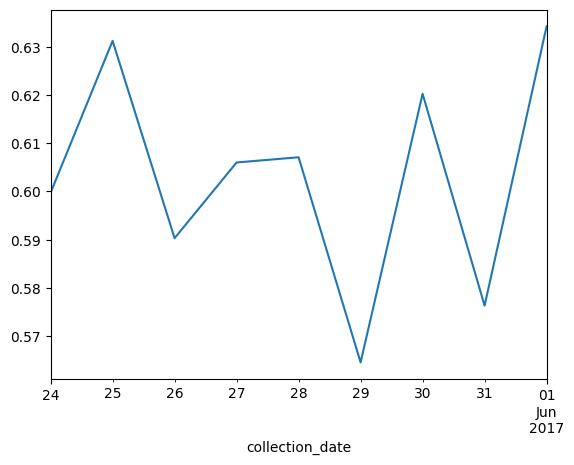

In [239]:
value.plot(kind='line')

**Create a pivot-table (or crosstab) with index as Past_Vote, Column as Vote_Now and cell values as the count of samples.
Answer - survey.pivot_table(index = 'Past_Vote', columns = 'Vote_Now', values = 'response_id', aggfunc = 'count')**

In [241]:
data.pivot_table(index='Past_Vote', columns= 'Vote_Now', values = 'response_id', aggfunc = 'count')

Vote_Now,AAP,AIMIM,BJP,BSP,HAM,INC,JAP(L),JD(U),LJP,Left Front,NOTA,Others,Plurals,RJD,RJJP,RLSP,Undecided,VIP
Past_Vote,,,,,,,,,,,,,,,,,,
BJP,7.0,1.0,1630.0,3.0,5.0,42.0,101.0,110.0,44.0,13.0,194.0,32.0,87.0,370.0,88.0,24.0,62.0,10.0
BSP,NaN,1.0,2.0,5.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Did not vote,8.0,5.0,231.0,2.0,1.0,22.0,41.0,69.0,10.0,16.0,83.0,11.0,51.0,195.0,20.0,3.0,31.0,5.0
HAM,2.0,NaN,25.0,NaN,1.0,NaN,3.0,2.0,2.0,NaN,4.0,NaN,NaN,6.0,4.0,NaN,1.0,NaN
INC,NaN,6.0,6.0,NaN,NaN,57.0,10.0,9.0,NaN,3.0,6.0,3.0,3.0,100.0,1.0,2.0,7.0,NaN
JAP(L),NaN,NaN,4.0,NaN,NaN,NaN,35.0,NaN,NaN,NaN,NaN,1.0,NaN,2.0,NaN,NaN,NaN,NaN
JD(U),6.0,10.0,254.0,2.0,2.0,45.0,72.0,279.0,29.0,9.0,90.0,18.0,43.0,435.0,13.0,25.0,36.0,6.0
LJP,NaN,NaN,76.0,1.0,NaN,4.0,3.0,6.0,9.0,2.0,3.0,NaN,2.0,17.0,1.0,NaN,1.0,NaN
Left Front,NaN,1.0,2.0,NaN,NaN,1.0,NaN,NaN,NaN,18.0,1.0,1.0,NaN,4.0,NaN,1.0,NaN,1.0


**Create a dataframe by performing a group by over age_group and calculate the count of total samples under each age_group.**

In [258]:
df_age_group=data.groupby('age_group').count()

**Create a dataframe by performing a group by over age_group and finding the count of total samples for each age_group that opted for the JD(U) party in Vote_Now.**

In [256]:
df=data[data['Vote_Now']=="JD(U)"].groupby('age_group').count()

In [257]:
df

,response_id,collection_date,Day,urban_rural,education,income,Vote_Now,Past_Vote,CM_satisfaction,MLA_satisfaction,age,gender,assembly_no,category,weight
age_group,,,,,,,,,,,,,,,
18-25,181,181,181,181,181,181,181,181,181,181,181,181,181,181,181
25-40,264,264,264,264,264,264,264,264,264,264,264,264,264,264,264
40-55,68,68,68,68,68,68,68,68,68,68,68,68,68,68,68
55+,13,13,13,13,13,13,13,13,13,13,13,13,13,13,13


**Join/Merge the two dataframes from questions 12 and 11 with the common column as age_group.**

In [259]:
pd.merge(df_age_group,df,on='age_group')

,response_id_x,collection_date_x,Day_x,urban_rural_x,education_x,income_x,Vote_Now_x,Past_Vote_x,CM_satisfaction_x,MLA_satisfaction_x,...,income_y,Vote_Now_y,Past_Vote_y,CM_satisfaction_y,MLA_satisfaction_y,age_y,gender_y,assembly_no_y,category_y,weight_y
age_group,,,,,,,,,,,,,,,,,,,,,
18-25,2094,2094,2094,2094,2094,2094,2094,2094,2094,2094,...,181,181,181,181,181,181,181,181,181,181
25-40,3844,3844,3844,3844,3844,3844,3844,3844,3844,3844,...,264,264,264,264,264,264,264,264,264,264
40-55,801,801,801,801,801,801,801,801,801,801,...,68,68,68,68,68,68,68,68,68,68
55+,128,128,128,128,128,128,128,128,128,128,...,13,13,13,13,13,13,13,13,13,13
